In [1]:
from baf2sql2unidec import *
import matplotlib.pyplot as plt
import os
import unidec
from unidec.metaunidec.mudeng import MetaUniDec
from unidec import tools as ud
import pandas as pd

In [2]:
def match(pks, masslist, names, tolerance):
    matches = []
    errors = []
    peaks = []
    nameslist = []

    for p in pks:

        target = p.mass
    #     print(target)
        nearpt = ud.nearestunsorted(masslist, target)

        match = masslist[nearpt]
        error = target-match
        if np.abs(error) < tolerance: 
            name = names[nearpt]
            p.error = error
        else:
            name = ""
        p.label = name
        p.match = match
        p.matcherror = error

        matches.append(match)
        errors.append(error)
        peaks.append(target)
        nameslist.append(name)
        
    matchlist = [peaks, matches, errors, nameslist]
    return matchlist 

### Updates:
- Now runs through pip installed unidec 
- Improved matching algorithm
- Added upload from .d files using baf2sql (much faster than mzML)


In [3]:
# path = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\testing\\20230710 4C_24h_1.d"
# directory = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h"
directory = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\testing"

scans = [434, 481]
# scans = [444, 500]
scans = [434, 500]

masslist = [13597.42, 13151.97, 12559.36]
names = ["CTB-H6", "CTB-LPETGVSEYG", "CTB-LPET"]
tolerance = 10

In [4]:
# spectrum = BafSpectrum()
# name, data = spectrum.export_scans_from_file(path, scanstart = scans[0], scanend = scans[1])
# plt.plot(data[:, 0], data[:, 1])
# plt.plot(spectrum.rt, spectrum.tic)
# plt.axvspan(spectrum.rt[scans[0]], spectrum.rt[scans[1]])

Specified BAF has 738 spectra with line and profile data.


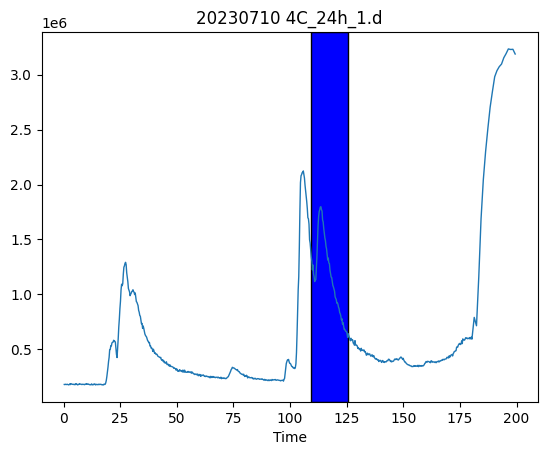

Specified BAF has 738 spectra with line and profile data.


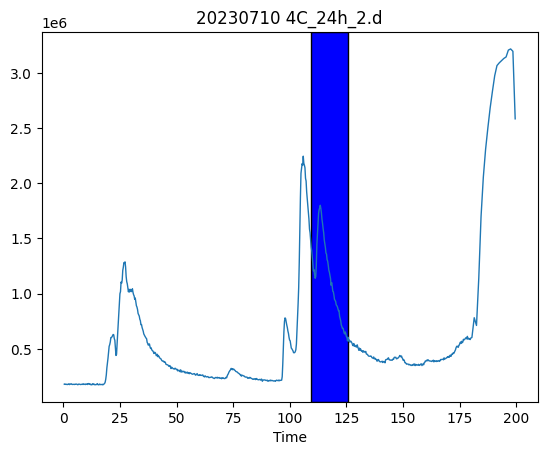

Specified BAF has 738 spectra with line and profile data.


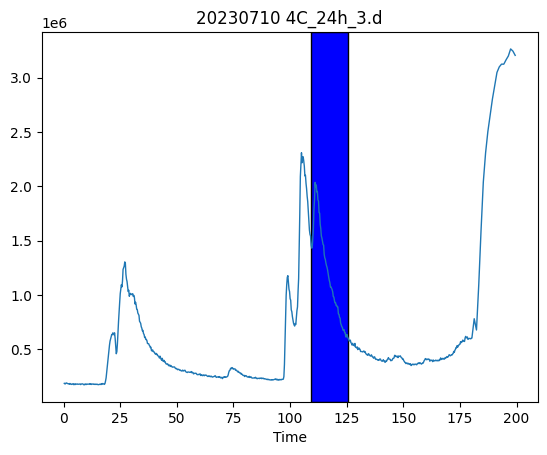

Specified BAF has 738 spectra with line and profile data.


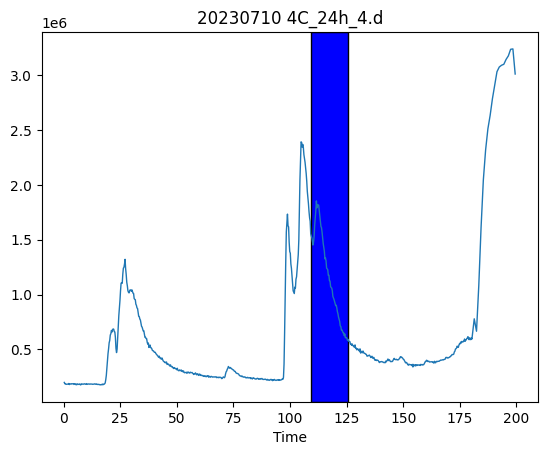

Specified BAF has 738 spectra with line and profile data.


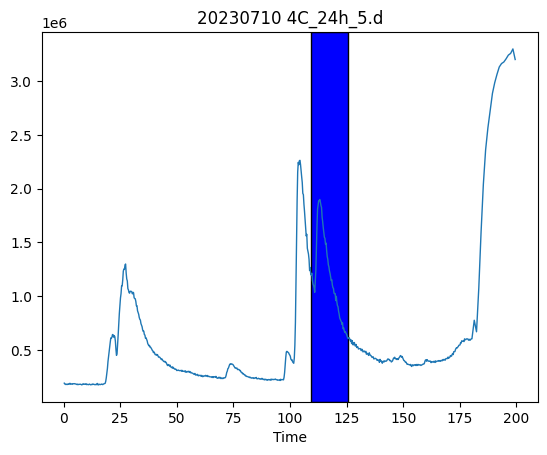

In [5]:
spectra_names = [x for x in os.listdir(directory) if x[-2:] == ".d"]

spectra = []
for s in spectra_names:
    path = os.path.join(directory, s)
    spectrum = BafSpectrum()
    spectrum.export_scans_from_file(path, scanstart = scans[0], scanend = scans[1])
    spectrum.plot_tic(show_scans=True)
    spectra.append(spectrum)

In [6]:
hdf5_name = os.path.split(directory)[1]+".hdf5"

hdf5_path = os.path.join(directory, hdf5_name)
eng= MetaUniDec()
eng.data.new_file(hdf5_path)


UniDec Engine v.6.0.4

UniDec Path: C:\Users\cm19ljc\Anaconda3\envs\unidec3\lib\site-packages\unidec\bin\unidec.exe


In [7]:
for s in spectra:
    
    eng.data.add_data(s.data2, name=s.name, export=False)
eng.data.export_hdf5()

Adding: 20230710 4C_24h_1.d to ms_dataset
Adding: 20230710 4C_24h_2.d to ms_dataset
Adding: 20230710 4C_24h_3.d to ms_dataset
Adding: 20230710 4C_24h_4.d to ms_dataset
Adding: 20230710 4C_24h_5.d to ms_dataset


In [8]:
len(spectra)

5

In [9]:
# Parameters
# UniDec
eng.config.minmz=700
eng.config.numit = 100
eng.config.zzsig = 1
eng.config.psig = 1
eng.config.beta = 1
eng.config.startz = 1
eng.config.endz = 100
eng.config.numz = 100
eng.config.mzsig = 0.85
eng.config.automzsig = 0
eng.config.psfun = 0
eng.config.psfunz = 0
eng.config.autopsfun = 0
eng.config.massub = 17000
eng.config.masslb = 12000
eng.config.msig = 0
eng.config.molig = 0
eng.config.massbins = 1
eng.config.adductmass = 1.007276467
eng.config.baselineflag = 1
eng.config.aggressiveflag = 0
eng.config.noiseflag = 0
eng.config.isotopemode = 0
eng.config.orbimode = 0

# Other
eng.config.mtabsig = 0
eng.config.poolflag = 2
eng.config.nativezub = 1000
eng.config.nativezlb = -1000
eng.config.inflate = 1
eng.config.linflag = 2
eng.config.integratelb = ""
eng.config.integrateub = ""
eng.config.filterwidth = 20
eng.config.zerolog = -12

eng.config.datanorm = 1
eng.config.subuff=100
eng.config.subtype=2

# peak picking
eng.config.peakwindow = 10
eng.config.peaknorm = 0
eng.config.peakplotthresh = 0.1 
eng.config.peakthresh = 0.01


eng.config.datanorm = 0
eng.config.exnorm = 0
eng.config.write_hdf5()

In [10]:
eng.config.__dict__

{'version': '6.0.4',
 'inputversion': None,
 'dtype': numpy.float32,
 'system': 'Windows',
 'infname': 'input.dat',
 'outfname': '',
 'mfile': 'mass.dat',
 'manualfile': 'man.dat',
 'smashfile': 'smash.dat',
 'confname': 'conf.dat',
 'hdf_file': 'default.hdf5',
 'ofile': 'ofile.dat',
 'matchfile': 'match.csv',
 'peaksfile': 'peaks.dat',
 'dirname': '',
 'udir': '',
 'filename': '',
 'extension': '',
 'deconfile': '',
 'errorfile': '',
 'fitdatfile': '',
 'massgridfile': '',
 'massdatfile': '',
 'cdrawextracts': '',
 'mzgridfile': '',
 'cdcreaderpath': 'C:\\Users\\cm19ljc\\Anaconda3\\envs\\unidec3\\lib\\site-packages\\unidec\\bin\\CDCreader.exe',
 'UniDecPath': 'C:\\Users\\cm19ljc\\Anaconda3\\envs\\unidec3\\lib\\site-packages\\unidec\\bin\\unidec.exe',
 'UniDecDir': 'C:\\Users\\cm19ljc\\Anaconda3\\envs\\unidec3\\lib\\site-packages\\unidec\\bin',
 'UniDecName': 'unidec.exe',
 'defaultUnidecDir': 'C:\\Users\\cm19ljc\\Anaconda3\\envs\\unidec3\\lib\\site-packages\\unidec\\bin',
 'opencomman

In [11]:
eng.open(hdf5_path)
eng.process_data()

eng.run_unidec()


Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)
Opening Time: 0.43784009999999896
Execution Time: 0.3111333000000016
Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)
Execution Time: 211.35975770000002
Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)


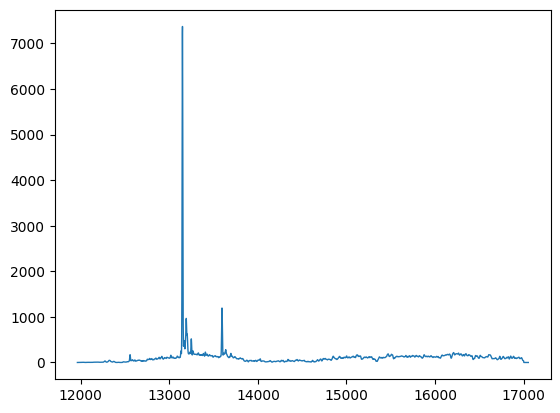

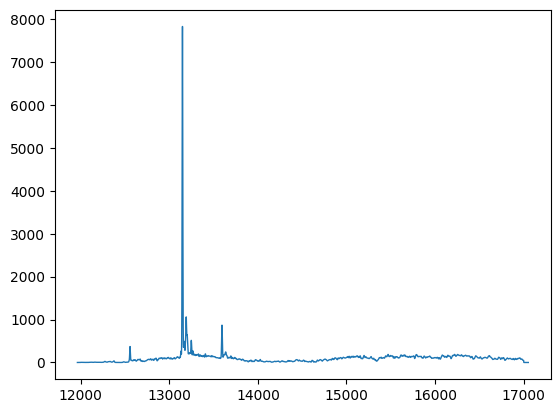

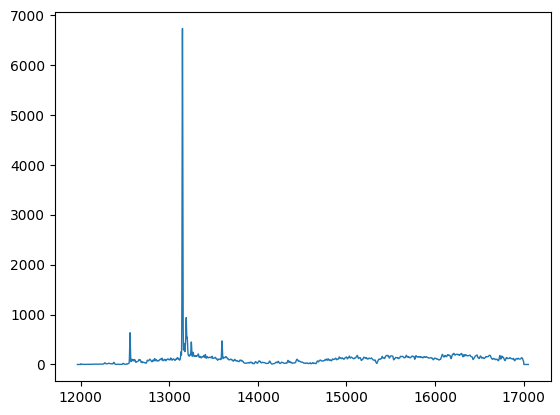

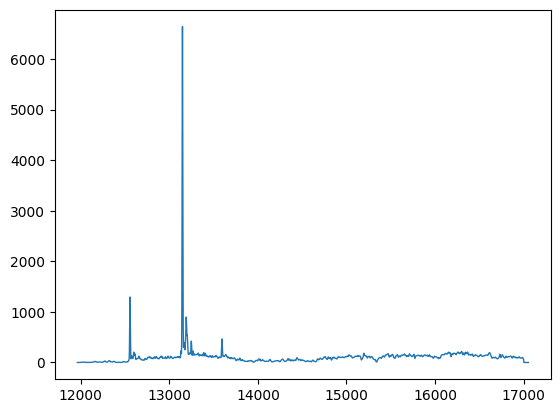

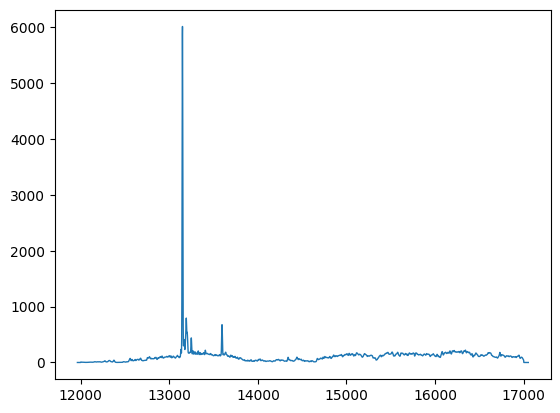

In [12]:
for s in eng.data.spectra:
    
    plt.plot(s.massdat[:,0],s.massdat[:,1],)
    # plt.xlim([13000, 14000])
    plt.show()

In [13]:
eng.config.peakthresh = 0.05

eng.pick_peaks()

Execution Time: 0.5865333000000135
Peak info saved to: D:\WORK\20230710 DOE_CTB H6_5M_DAmp\testing\UniDec_Figures_and_Files\testing_extracts.txt


In [14]:
# eng.config.beta

20230710 4C_24h_1.d


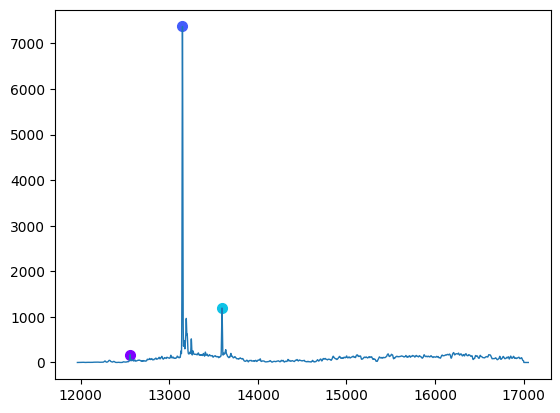

20230710 4C_24h_2.d


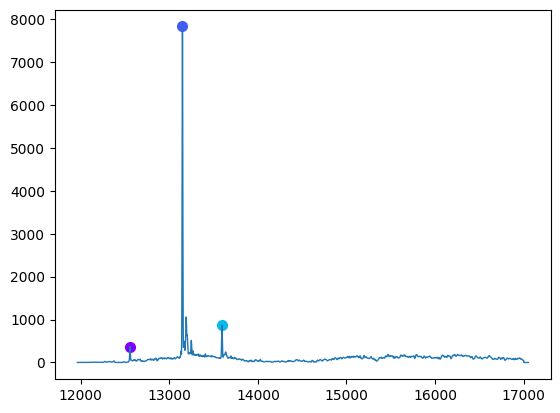

20230710 4C_24h_3.d


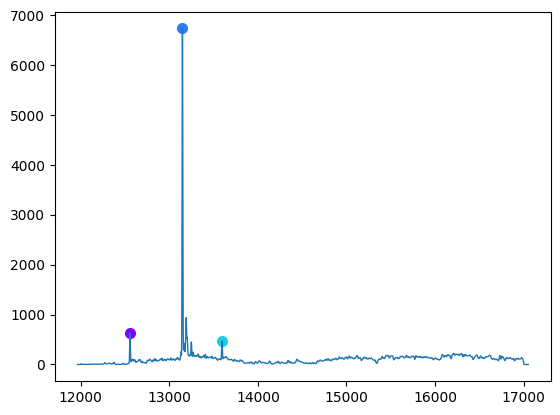

20230710 4C_24h_4.d


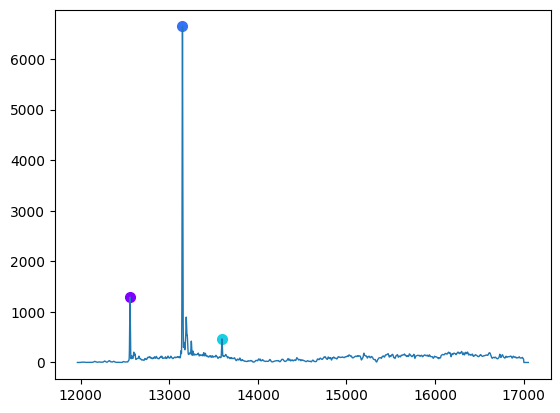

20230710 4C_24h_5.d


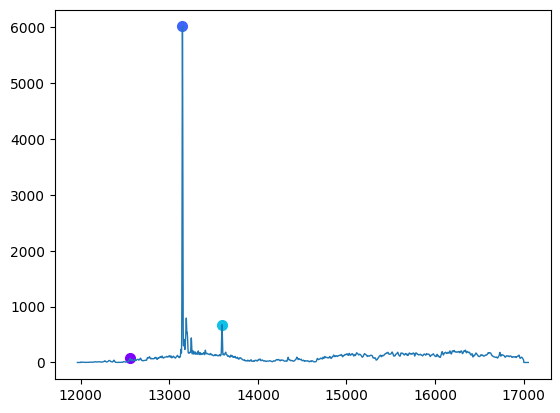

In [15]:
for s in eng.data.spectra:
    print(s.name)
    
    # match peaks to oligos
    match(s.pks.peaks, masslist, names, tolerance)
    
    
    
    plt.plot(s.massdat[:,0],s.massdat[:,1],)
    for p in s.pks.peaks:
#         plt.scatter(p.mass, p.height)
        if p.label != "":
            plt.scatter(p.mass, p.height, color = p.color)
    plt.show()
    
# dct = {"Label":label, "Mass":mass, "Height":height, "Name":s_name}    

In [16]:
dfs = []
for s in eng.data.spectra:
    counter = 0
    label = []
    mass = []
    height = []
    for p in s.pks.peaks:

        if p.label !="":

            label.append(p.label)
            mass.append(p.mass)
            height.append(p.height)
            counter = counter+1
    s_name = [s.name]*counter

    dct = {"Label":label, "Mass":mass, "Height":height, "Name":s_name}
    df = pd.DataFrame(dct)
    df['Percentage_Labelling'] = (df.Height/df.Height.sum())*100
    dfs.append(df)
results_df = pd.concat(dfs)

In [17]:
results2 = pd.pivot(results_df, index='Name', columns='Label', values = 'Percentage_Labelling').fillna(0)

results2.reset_index(inplace=True)


In [18]:
conditions_input_df = pd.read_excel(os.path.join(directory, "Conditions_input.xlsx"))

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\testing\\Conditions_input.xlsx'

In [ ]:
results2.Name = results2['Name'].str.rstrip('.d')

In [ ]:
results2 = conditions_input_df.merge(results2, how='left', on="Name")

In [ ]:
results2

In [ ]:
results_name = os.path.split(directory)[1]+"_results.xlsx"
results_path = os.path.join(directory,results_name)
results2.to_excel(results_path)